# Bank Personal Loan Modelling

In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math

In [2]:
#Read the data from .csv file
BankData=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
BankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
BankData.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
BankData.shape

(5000, 14)

In [6]:
BankData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

___
<span style='background :yellow' >No Blank Data</span> <br>
___

In [7]:
BankData.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


___
<span style='background :yellow' >Experience Column has negative values</span> <br>
___

In [8]:
#printing the rows with negative Experience values
BankData[BankData['Experience']< 0]  

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [9]:
#Removing Negative values and replace NaN
BankData[BankData< 0] = np.nan 

In [10]:
nan_values=BankData.isna().any(axis=1)  # Stores True if NaN else False

In [11]:
#printing rows with NaN 
BankData[BankData.isna().any(axis=1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,NaN,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,NaN,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,NaN,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,NaN,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,NaN,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,NaN,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,NaN,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,NaN,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,NaN,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,NaN,125,92835,2,7.20,1,0,0,1,0,0,1


In [12]:
BankData.isnull().sum()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

___
<span style='background :yellow' >Total 52 rows with negative values for Experience</span> <br>
___

In [13]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          4948 non-null   float64
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [14]:
# median for each column
BankData.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [15]:
# Fill NaN with median 
BankData = BankData.fillna(BankData.median())
BankData['Experience']=BankData['Experience'].astype('int64')

In [16]:
BankData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [17]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [18]:
BankData[nan_values==True]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,20,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,20,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,20,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,20,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,20,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,20,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,20,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,20,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,20,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,20,125,92835,2,7.20,1,0,0,1,0,0,1


___
<span style='background :yellow' >Negative values are now replaced with median values</span> <br>
___

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'ZIP Code'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>,
        <AxesSubplot:title={'center':'CD Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

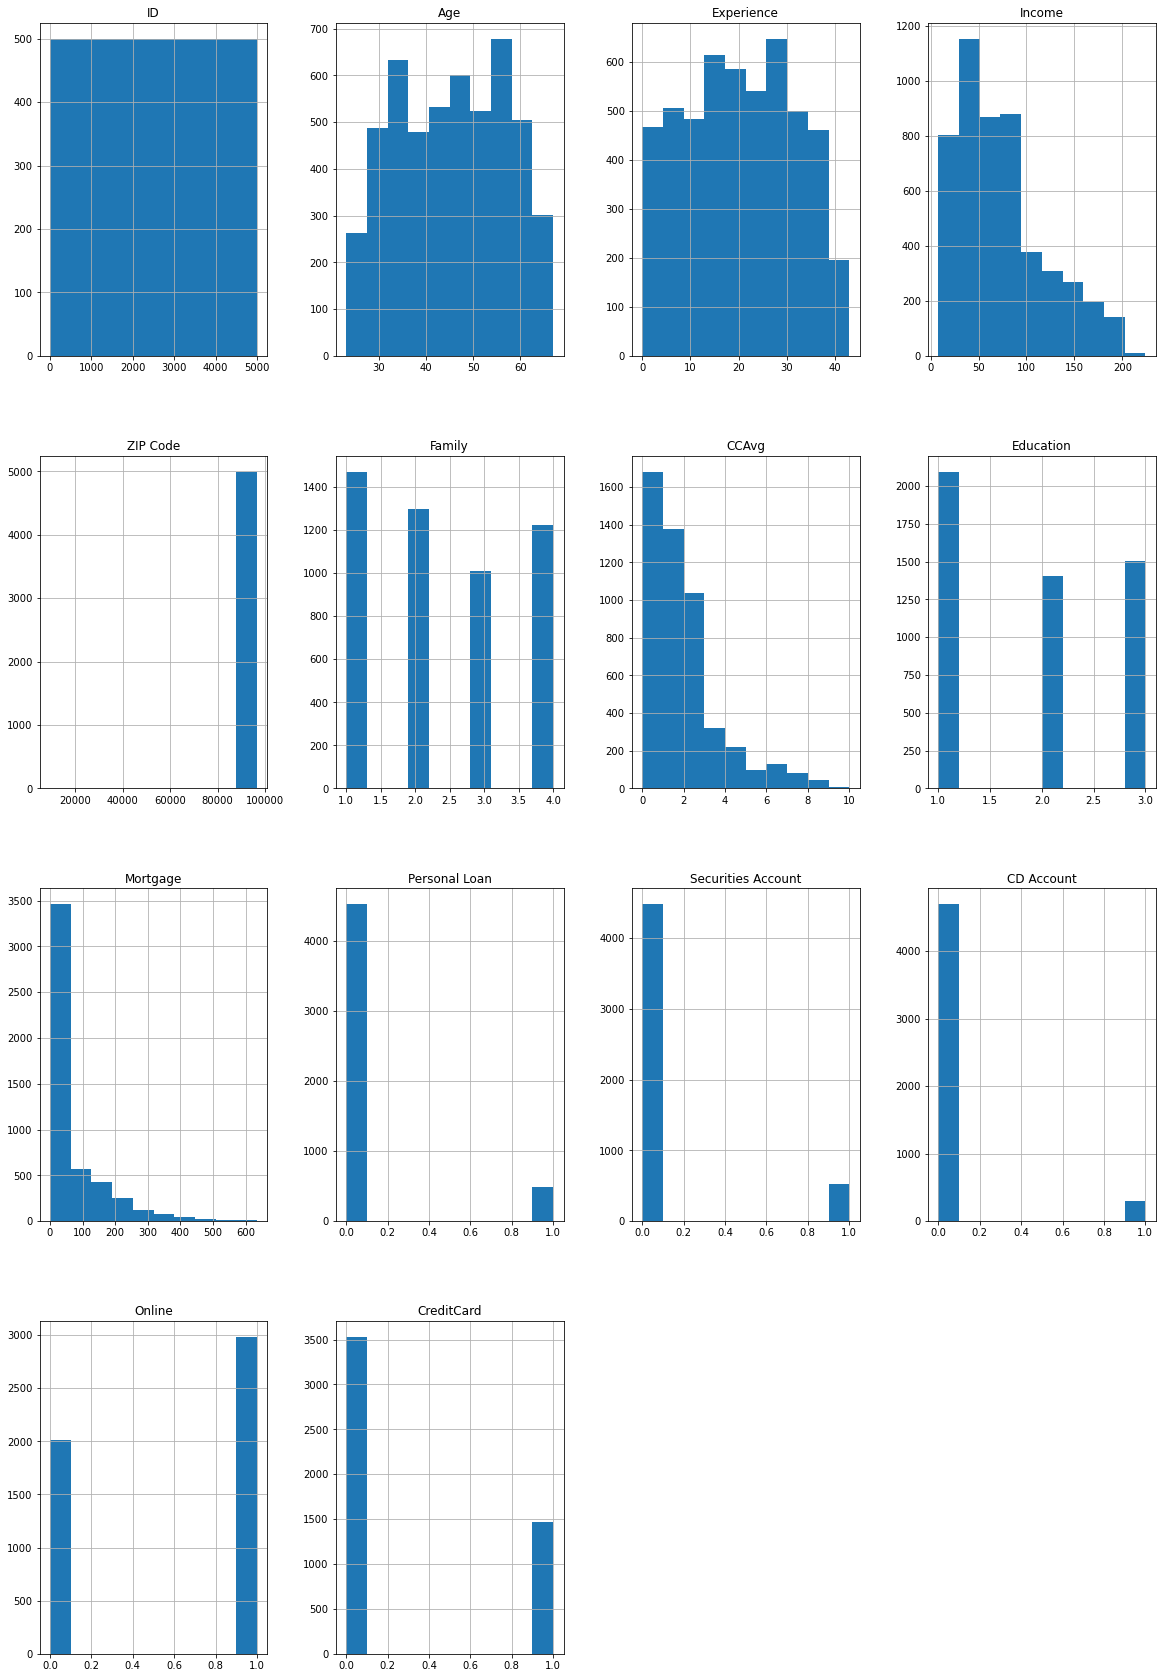

In [19]:
#plotting histograms for each column
BankData.hist(figsize=(20,30))

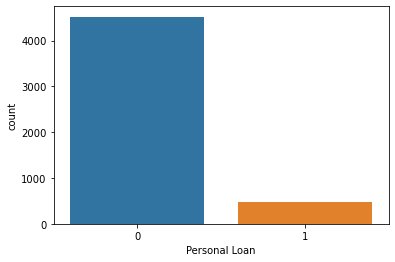

In [20]:
ax=sns.countplot(x='Personal Loan', data=BankData)

In [21]:
counts=pd.pivot_table(BankData,['Age'], index=['Personal Loan'], aggfunc=len).reset_index()
counts=counts.rename(columns={"Age":"Personal Loan Count"})
counts=counts.rename(columns={"Personal Loan":"Labels"})
counts

,Labels,Personal Loan Count
0,0,4520
1,1,480


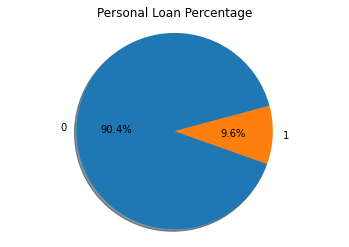

In [22]:
my_labels = counts['Labels']
plt.pie(counts['Personal Loan Count'], labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True)
plt.title("Personal Loan Percentage")
plt.axis('equal')
plt.show()

___
<span style='background :yellow' >9.6% people have accepted Personal Loan</span><br>
___

In [23]:
pd.crosstab(BankData['Personal Loan'],BankData['Education'])

Education,1,2,3
Personal Loan,,,
0,2003,1221,1296
1,93,182,205


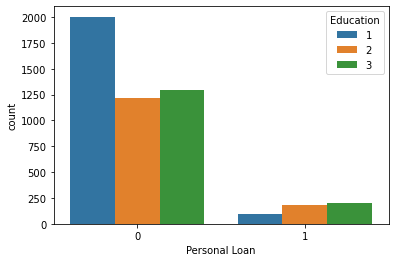

In [24]:
ax=sns.countplot(x='Personal Loan',hue='Education', data=BankData)

<AxesSubplot:xlabel='Education', ylabel='count'>

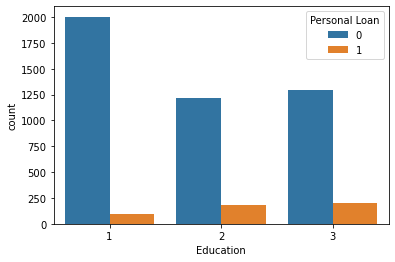

In [25]:
sns.countplot(x='Education',hue='Personal Loan', data=BankData)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

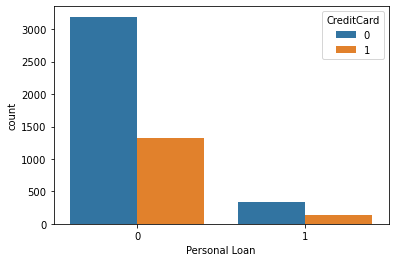

In [26]:
sns.countplot(x='Personal Loan',hue='CreditCard', data=BankData)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

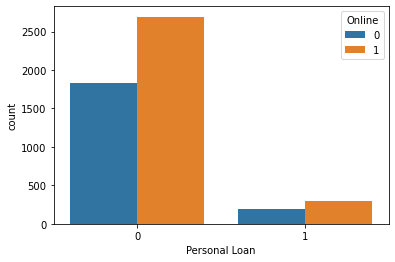

In [27]:
sns.countplot(x='Personal Loan',hue='Online', data=BankData)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

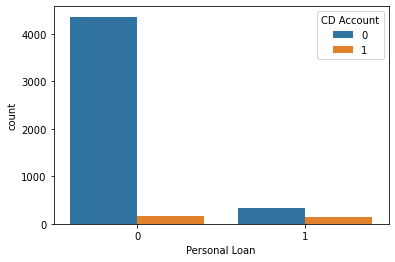

In [28]:
sns.countplot(x='Personal Loan',hue='CD Account', data=BankData)

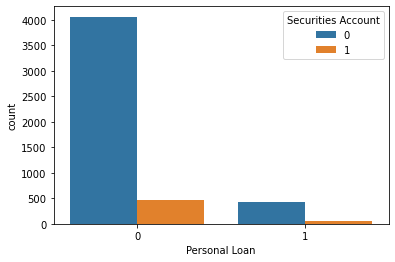

In [29]:
ax=sns.countplot(x='Personal Loan',hue='Securities Account', data=BankData)

<AxesSubplot:xlabel='Family', ylabel='count'>

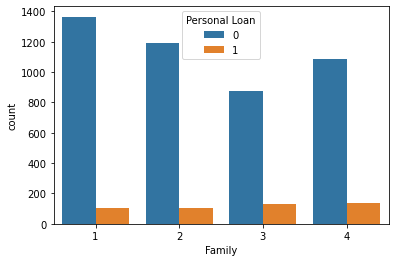

In [30]:
sns.countplot(hue='Personal Loan',x='Family', data=BankData)

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

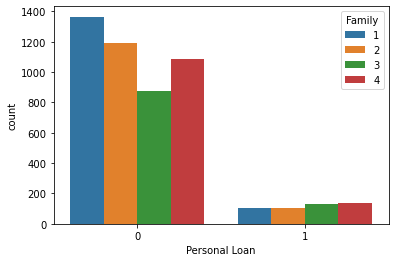

In [31]:
sns.countplot(x='Personal Loan',hue='Family', data=BankData)

In [32]:
pd.pivot_table(BankData,['Age','Experience','Income','Mortgage','CCAvg'], index=['Personal Loan'])

,Age,CCAvg,Experience,Income,Mortgage
Personal Loan,,,,,
0,45.367257,1.729009,20.378982,66.237389,51.789381
1,45.066667,3.905354,19.843750,144.745833,100.845833


In [33]:
pd.pivot_table(BankData,['Age','Experience','Income','Mortgage','CCAvg'], index=['Personal Loan'],columns=['Education'])

Age                           CCAvg                      \
Education              1          2          3         1         2         3   
Personal Loan                                                                  
0              44.929606  45.100737  46.294753  2.201832  1.345528  1.359537   
1              45.698925  44.631868  45.165854  3.531505  3.963132  4.023659   

              Experience                            Income              \
Education              1          2          3           1           2   
Personal Loan                                                            
0              20.207688  20.098280  20.908179   83.204693   52.266994   
1              20.677419  19.456044  19.809756  136.881720  145.131868   

                             Mortgage                         
Education               3           1          2           3  
Personal Loan                                                 
0               53.175926   59.000999  45.341523   46.718364  
1              147.970732  118.193548  91.423077  101.341463

<AxesSubplot:xlabel='Education', ylabel='Income'>

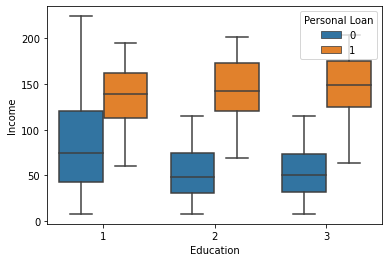

In [34]:
sns.boxplot(x='Education', y='Income',hue='Personal Loan',data = BankData)

___
<span style='background :yellow' >People with high incomes accepted Personal Loan </span> <br>
___

<AxesSubplot:xlabel='Education', ylabel='Age'>

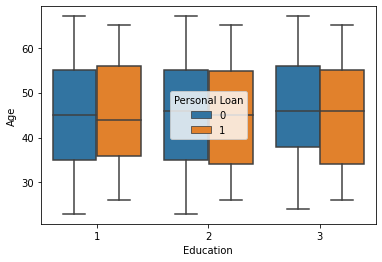

In [35]:
sns.boxplot(x='Education', y='Age',hue='Personal Loan',data = BankData)

<AxesSubplot:xlabel='Family', ylabel='Income'>

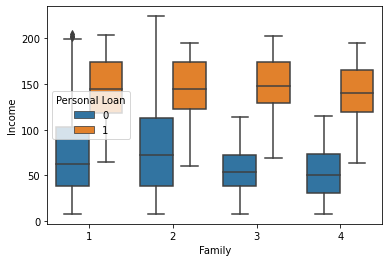

In [36]:
sns.boxplot(x='Family', y='Income',hue='Personal Loan',data = BankData)

<AxesSubplot:xlabel='Family', ylabel='Age'>

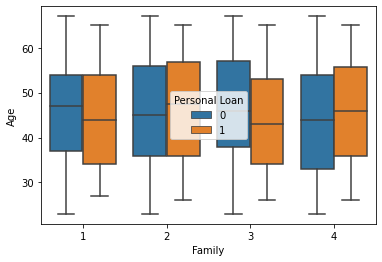

In [37]:
sns.boxplot(x='Family', y='Age',hue='Personal Loan',data = BankData)

<AxesSubplot:xlabel='Education', ylabel='CCAvg'>

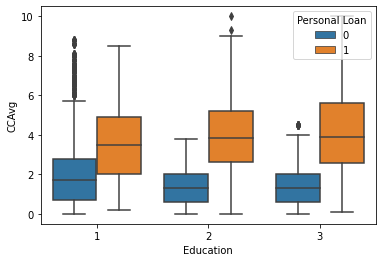

In [38]:
sns.boxplot(x='Education', y='CCAvg',hue='Personal Loan',data = BankData)

___
<span style='background :yellow' >People with high spending on Credit Cards accepted Personal Loan</span> <br>
___

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

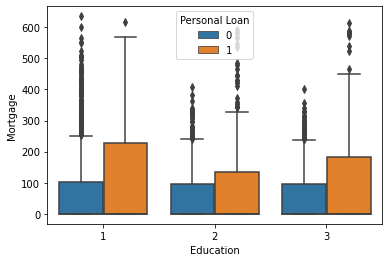

In [39]:
sns.boxplot(x='Education', y='Mortgage',hue='Personal Loan',data = BankData)

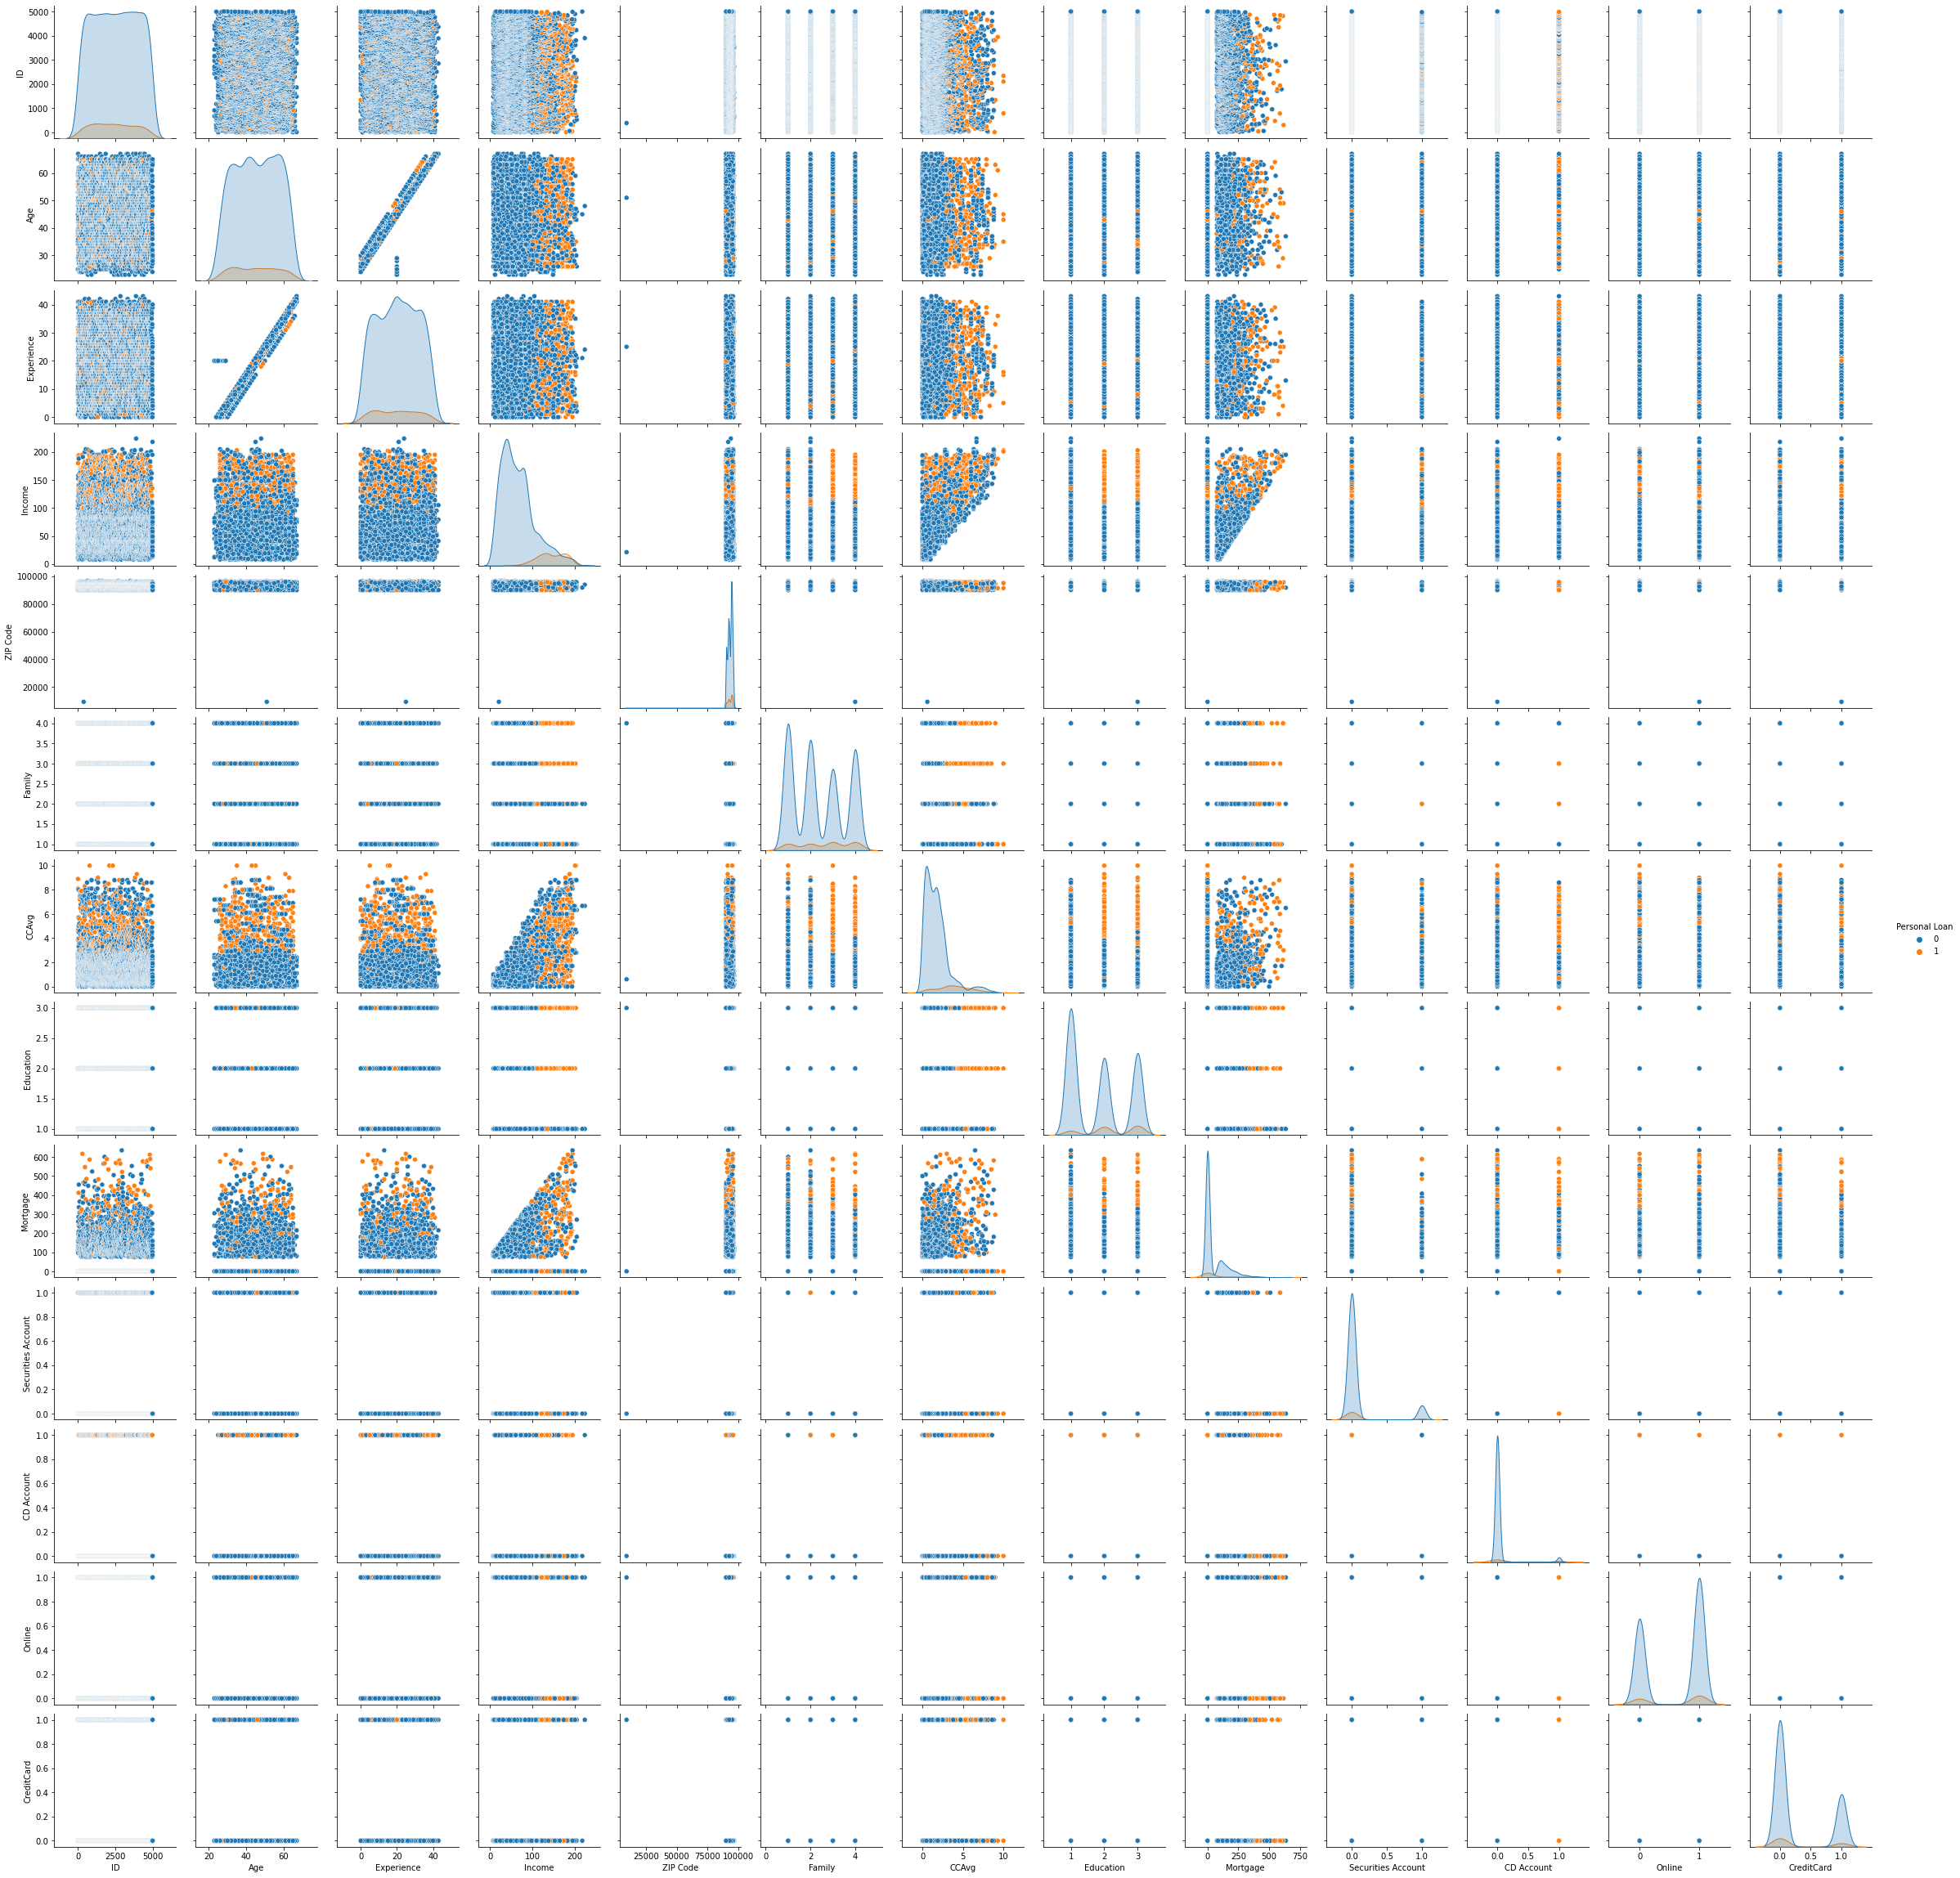

In [40]:
sns.pairplot(BankData,diag_kind='kde',hue='Personal Loan')

___
<span style='background :yellow' > Age and Experience are strongly correlated </span> <br>
___

In [41]:
corr = BankData.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<AxesSubplot:>

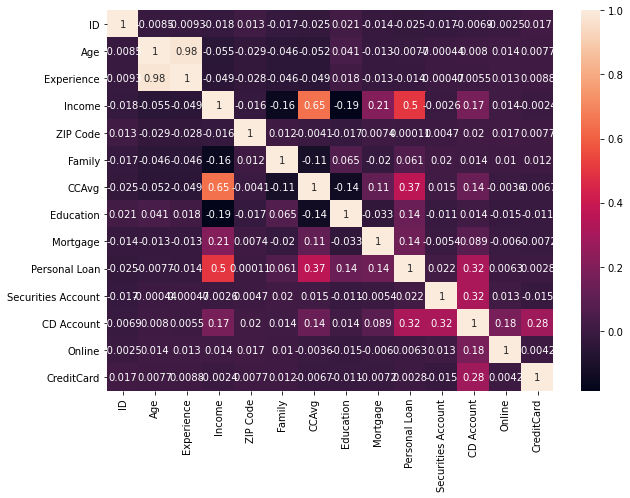

In [42]:
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(corr, annot=True)

In [43]:
#Performing one hot encoding to binarize the education column
Educ=pd.get_dummies(BankData['Education'],drop_first=True)
Educ.head()

,2,3
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0


In [44]:
# Replacing values for Family column
BankData['Family']=BankData['Family'].replace({2:'Family_2',3:'Family_3', 4:'Family_4'})
BankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,Family_4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,Family_3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,Family_4,1.0,2,0,0,0,0,0,1


In [45]:
family=pd.get_dummies(BankData['Family'],drop_first=True)
family.head()

,Family_2,Family_3,Family_4
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,1


In [46]:
BankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,Family_4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,Family_3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,Family_4,1.0,2,0,0,0,0,0,1


In [47]:
 # merge all the necessary columns and drop duplicate ones
BankData=pd.concat([BankData,family,Educ],axis=1)
BankData.drop(['Family','Education'],axis=1,inplace=True)

In [48]:
BankData.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,2,3
0,1,25,1,49,91107,1.6,0,0,1,0,0,0,0,0,1,0,0
1,2,45,19,34,90089,1.5,0,0,1,0,0,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,2.7,0,0,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,1.0,0,0,0,0,0,1,0,0,1,1,0


In [49]:
# Shifting Target column i.e. Personal Loan to the end
loan=BankData['Personal Loan']
BankData.drop('Personal Loan',axis=1,inplace=True)
BankData.drop(['ID','ZIP Code'],axis=1,inplace=True)

BankData=pd.concat([BankData,loan],axis=1)
BankData.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,2,3,Personal Loan
0,25,1,49,1.6,0,1,0,0,0,0,0,1,0,0,0
1,45,19,34,1.5,0,1,0,0,0,0,1,0,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,1,0,0
4,35,8,45,1.0,0,0,0,0,1,0,0,1,1,0,0


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [51]:
x=BankData.drop('Personal Loan',axis=1)
y=BankData['Personal Loan'] # Target 

In [52]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.30,random_state=1)

In [53]:
model=LogisticRegression()
model.fit(x_train1,y_train1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
predictions1=model.predict(x_test1)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,predictions1)

0.95

In [56]:
from sklearn import metrics
print(metrics.classification_report(y_test1,predictions1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.87      0.58      0.70       149

    accuracy                           0.95      1500
   macro avg       0.91      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1,predictions1)

array([[1338,   13],
       [  62,   87]], dtype=int64)

<AxesSubplot:>

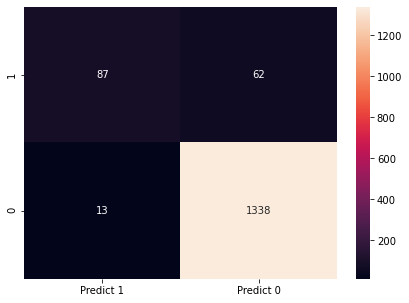

In [58]:
cm=metrics.confusion_matrix(y_test1,predictions1,labels=[1,0])

Data_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],
                    columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(Data_cm,annot=True,fmt='g')

# Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators=10)

gbcl = gbcl.fit(x_train1,y_train1)

0.962


<AxesSubplot:>

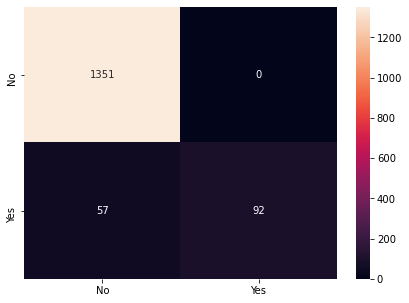

In [60]:
y_predict4 = gbcl.predict(x_test1)
print(gbcl.score(x_test1,y_test1))
cm=metrics.confusion_matrix(y_test1,y_predict4,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt='g')

In [61]:
from sklearn import metrics
print(metrics.classification_report(y_test1,y_predict4))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1351
           1       1.00      0.62      0.76       149

    accuracy                           0.96      1500
   macro avg       0.98      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500



# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=80,max_features=3)  # max_features close to square root of total attributes or columns
rfcl=rfcl.fit(x_train1,y_train1)

0.9806666666666667


<AxesSubplot:>

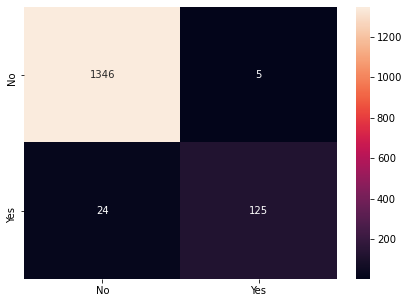

In [63]:
y_predict5 = rfcl.predict(x_test1)
print(rfcl.score(x_test1,y_test1))
cm=metrics.confusion_matrix(y_test1,y_predict5,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt='g')

In [64]:
confusion_matrix(y_test1,y_predict5)

array([[1346,    5],
       [  24,  125]], dtype=int64)

In [65]:
from sklearn import metrics
print(metrics.classification_report(y_test1,y_predict5))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.96      0.84      0.90       149

    accuracy                           0.98      1500
   macro avg       0.97      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



# K-Nearest Neighbour

### Normalize Data

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.stats import zscore

In [67]:
X=BankData.drop('Personal Loan',axis=1)
y=BankData['Personal Loan']
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,2,3
0,25,1,49,1.6,0,1,0,0,0,0,0,1,0,0
1,45,19,34,1.5,0,1,0,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,1,0,0,1,1,0


In [68]:
XScaled  = X.apply(zscore)
XScaled.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,2,3
0,-1.774417,-1.717717,-0.538229,-0.193385,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,-0.591517,-0.503123,1.758310,-0.624538,-0.654965
1,-0.029524,-0.117989,-0.864109,-0.250611,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,-0.591517,1.987585,-0.568728,-0.624538,-0.654965
2,-0.552992,-0.473484,-1.363793,-0.536736,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,-0.591517,-0.503123,-0.568728,-0.624538,-0.654965
3,-0.901970,-1.006727,0.569765,0.436091,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,-0.591517,-0.503123,-0.568728,1.601185,-0.654965
4,-0.901970,-1.095601,-0.625130,-0.536736,-0.555524,-0.341423,-0.25354,-1.216618,1.549632,-0.591517,-0.503123,1.758310,1.601185,-0.654965


### Train Test Split

In [69]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(XScaled,y,test_size=0.30)

### Using KNN

In [70]:
knn = KNeighborsClassifier(n_neighbors=7,weights = 'distance' ,metric='euclidean')

In [71]:
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [72]:
y_pred6 = knn.predict(X_test_knn)

In [73]:
knn.score(X_test_knn,y_test_knn)

0.9473333333333334

In [74]:
metrics.accuracy_score(y_test_knn,y_pred6)

0.9473333333333334

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(confusion_matrix(y_test_knn,y_pred6))

[[1339    1]
 [  78   82]]


In [77]:
print(classification_report(y_test_knn,y_pred6))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1340
           1       0.99      0.51      0.67       160

    accuracy                           0.95      1500
   macro avg       0.97      0.76      0.82      1500
weighted avg       0.95      0.95      0.94      1500



# Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
GNBmodel=GaussianNB()                    

In [79]:
x_train_NB,x_test_NB,y_train_NB,y_test_NB=train_test_split(x,y,test_size=0.30,random_state=1)

In [80]:
GNBmodel.fit(x_train_NB,y_train_NB)

GaussianNB()

In [81]:
y_pred7 = GNBmodel.predict(x_test_NB)

In [82]:
GNBmodel.score(x_test_NB,y_test_NB)

0.8753333333333333

In [83]:
GNBmodel.score(x_train_NB,y_train_NB)

0.8911428571428571

In [84]:
metrics.accuracy_score(y_test_NB, y_pred7)

0.8753333333333333

In [85]:
metrics.accuracy_score(y_test_NB, y_pred7)

0.8753333333333333

In [86]:
print(confusion_matrix(y_test_NB,y_pred7))

[[1228  123]
 [  64   85]]


In [87]:
print(classification_report(y_test_NB,y_pred7))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



# ROC & AUC Comparision

In [88]:
from sklearn. metrics import roc_auc_score,auc
from sklearn. metrics import roc_curve

In [89]:
fpr1, tpr1, thresholds1 = roc_curve(y_test1, model.predict_proba(x_test1) [:, 1])
logit_roc_auc1=roc_auc_score(y_test1,model.predict(x_test1))
roc_auc1 = auc(fpr1, tpr1)

In [90]:
fpr2, tpr2, thresholds2 = roc_curve(y_test1, gbcl.predict_proba(x_test1) [:, 1])
logit_roc_auc2=roc_auc_score(y_test1,gbcl.predict(x_test1))
roc_auc2 = auc(fpr2, tpr2)

In [91]:
fpr3, tpr3, thresholds3 = roc_curve(y_test1, rfcl.predict_proba(x_test1) [:, 1])
logit_roc_auc3=roc_auc_score(y_test1,rfcl.predict(x_test1))
roc_auc3 = auc(fpr3, tpr3)

In [92]:
fpr4, tpr4, thresholds4 = roc_curve(y_test_knn, knn.predict_proba(X_test_knn) [:, 1])
logit_roc_auc4=roc_auc_score(y_test_knn,knn.predict(X_test_knn))
roc_auc4=auc(fpr4, tpr4)

In [93]:
fpr5, tpr5, thresholds5 = roc_curve(y_test_NB, GNBmodel.predict_proba(x_test_NB) [:, 1])
logit_roc_auc5=roc_auc_score(y_test_NB,GNBmodel.predict(x_test_NB))
roc_auc5 = auc(fpr5, tpr5)

<Figure size 432x288 with 0 Axes>

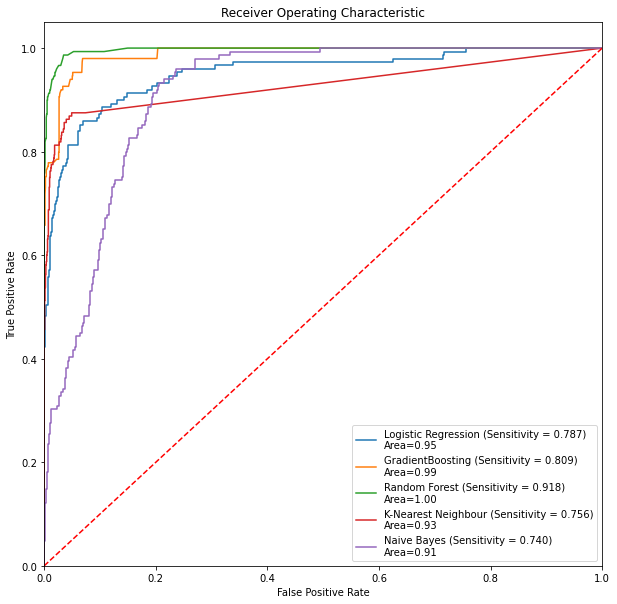

In [94]:
import matplotlib.pyplot as plt
plt.figure( )
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, label= 'Logistic Regression (Sensitivity = %0.3f)' % logit_roc_auc1 + "\nArea=%0.2f" % roc_auc1)
plt.plot(fpr2, tpr2, label= 'GradientBoosting (Sensitivity = %0.3f)' % logit_roc_auc2 + "\nArea=%0.2f" % roc_auc2)
plt.plot(fpr3, tpr3, label= 'Random Forest (Sensitivity = %0.3f)' % logit_roc_auc3 + "\nArea=%0.2f" % roc_auc3)
plt.plot(fpr4, tpr4, label= 'K-Nearest Neighbour (Sensitivity = %0.3f)' % logit_roc_auc4 + "\nArea=%0.2f" % roc_auc4)
plt.plot(fpr5, tpr5, label= 'Naive Bayes (Sensitivity = %0.3f)' % logit_roc_auc5 + "\nArea=%0.2f" % roc_auc5)
plt.plot ([0, 1], [0, 1], 'r--' )
plt.xlim( [0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel( 'False Positive Rate' )
plt.ylabel( 'True Positive Rate' )
plt.title('Receiver Operating Characteristic' )
plt.legend (loc="lower right")
#plt.savefig ( 'Log_ROC')
 
plt.show( )

# 10-fold Cross Validation

In [95]:
from sklearn.model_selection import KFold
#model=LogisticRegression()
kfold_validation=KFold(10)

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
# For Logistic Regression
results1=cross_val_score(model,x,y,cv=kfold_validation)
print(results1)
print(np.mean(results1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.96  0.938 0.958 0.944 0.96  0.936 0.954 0.948 0.952 0.96 ]
0.9510000000000002


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [98]:
# Gradient Boosting
results2=cross_val_score(gbcl,x,y,cv=kfold_validation)
print(results2)
print(np.mean(results2))

[0.972 0.974 0.964 0.95  0.964 0.958 0.974 0.976 0.964 0.974]
0.967


In [99]:
# Random Forest
results3=cross_val_score(rfcl,x,y,cv=kfold_validation)
print(results3)
print(np.mean(results3))

[0.986 0.992 0.982 0.982 0.982 0.986 0.996 0.994 0.992 0.986]
0.9878


In [100]:
# K-Nearest Neighbour
results4=cross_val_score(knn,XScaled,y,cv=kfold_validation)
print(results4)
print(np.mean(results4))

[0.962 0.96  0.956 0.966 0.946 0.942 0.952 0.944 0.982 0.96 ]
0.9570000000000001


In [101]:
# Naive Bayes
results5=cross_val_score(GNBmodel,x,y,cv=kfold_validation)
print(results5)
print(np.mean(results5))

[0.89  0.866 0.892 0.87  0.888 0.876 0.886 0.878 0.888 0.896]
0.883
